# Initial EDA

Here we:
* Take a first look at the data and some of its distributions
* Feature-engineer an "energy" variable based on earthquake magnitude
* Create a "lattice network" centered at latitude 34 and longitude -118
* Calculate how far away every earthquake is from every lattice point
* Assign a distance-weighted value for every earthquake to every lattice point

The latter half of these steps will be more fully developed in the `LA_data_prep.ipynb` file

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df1 = pd.read_csv('../Data/LA_1970_1978')
df2 = pd.read_csv('../Data/LA_1979_1988')
df3 = pd.read_csv('../Data/LA_1989_1999')
df4 = pd.read_csv('../Data/LA_2000_2023')

main_df = pd.concat((df1, df2, df3, df4)).reset_index(drop=True)

main_df.head()

,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance
0,ci3324955,1970-01-02 10:45:20.570,"24km S of Santa Barbara, CA",34.206000,-119.695667,6.0,3.14,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,152
1,ci3324959,1970-01-03 19:48:40.840,"6km NE of Banning, CA",33.960500,-116.830500,6.0,3.16,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,154
2,ci3324960,1970-01-04 02:27:15.700,"8km N of Big Bear City, CA",34.333500,-116.843333,6.0,2.74,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
3,ci3324875,1970-01-08 02:16:41.350,"8km NE of Lake Arrowhead, CA",34.307833,-117.139833,6.0,2.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
4,ci3324882,1970-01-10 02:47:03.430,"10km NNW of Santa Paula, CA",34.435833,-119.112000,6.0,3.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,141


In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222284 entries, 0 to 222283
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            222284 non-null  object 
 1   time          222284 non-null  object 
 2   location      222284 non-null  object 
 3   latitude      222284 non-null  float64
 4   longitude     222284 non-null  float64
 5   depth         222284 non-null  float64
 6   magnitude     213208 non-null  float64
 7   alert         67 non-null      object 
 8   url           222284 non-null  object 
 9   eventtype     222284 non-null  object 
 10  significance  222284 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 18.7+ MB


## Light EDA

In [4]:
main_df.head()

,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance
0,ci3324955,1970-01-02 10:45:20.570,"24km S of Santa Barbara, CA",34.206000,-119.695667,6.0,3.14,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,152
1,ci3324959,1970-01-03 19:48:40.840,"6km NE of Banning, CA",33.960500,-116.830500,6.0,3.16,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,154
2,ci3324960,1970-01-04 02:27:15.700,"8km N of Big Bear City, CA",34.333500,-116.843333,6.0,2.74,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
3,ci3324875,1970-01-08 02:16:41.350,"8km NE of Lake Arrowhead, CA",34.307833,-117.139833,6.0,2.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116
4,ci3324882,1970-01-10 02:47:03.430,"10km NNW of Santa Paula, CA",34.435833,-119.112000,6.0,3.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,141


In [12]:
main_df['time'] = pd.to_datetime(main_df['time'])

main_df['year'] = main_df['time'].dt.year

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


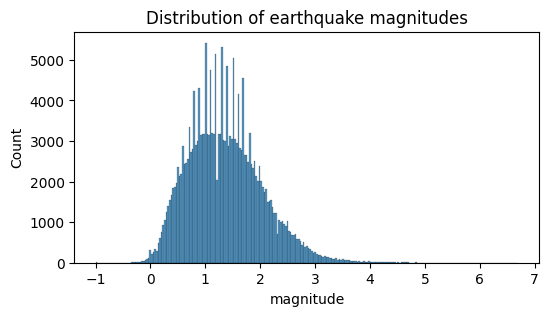

In [20]:
plt.figure(figsize=(6,3))
sns.histplot(x=main_df['magnitude'])
plt.title('Distribution of earthquake magnitudes');

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


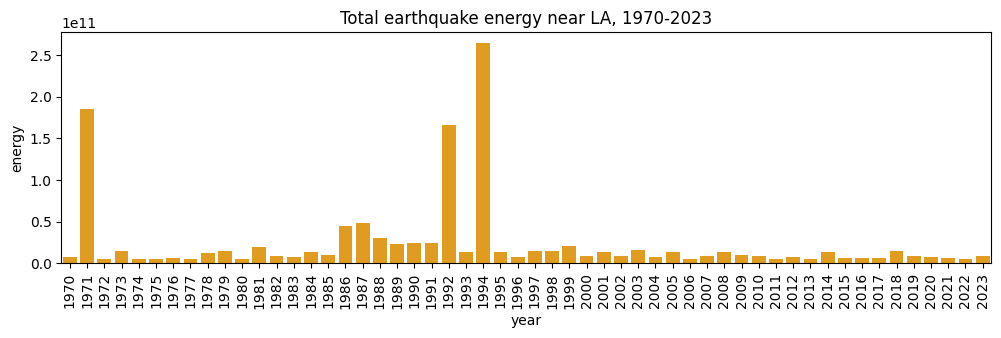

In [42]:
plt.figure(figsize=(12,3))
sns.barplot(data = pd.DataFrame(main_df.groupby('year')['energy'].sum()).reset_index(),
           x='year',y='energy', color='orange')
plt.title("Total earthquake energy near LA, 1970-2023")
plt.xticks(rotation=90);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='depth', ylabel='Count'>

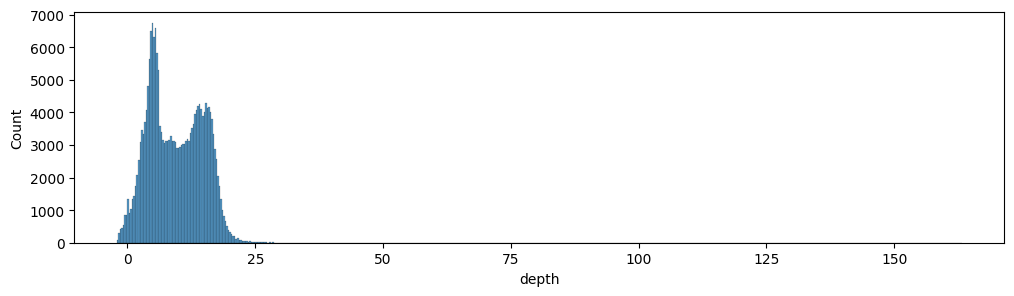

In [6]:
plt.figure(figsize=(12,3))
sns.histplot(x=main_df['depth'])

In [7]:
#seeing if there are event types other than "earthquake"
main_df['eventtype'].value_counts()

eventtype
earthquake    222284
Name: count, dtype: int64

In [29]:
for i in main_df['magnitude'][:10]:
    energy = 10 ** (4.4 + 1.5*i)
    print(f"Magnitude: {i} Energy: {np.round(energy)}")

Magnitude: 3.14 Energy: 1288249552.0
Magnitude: 3.16 Energy: 1380384265.0
Magnitude: 2.74 Energy: 323593657.0
Magnitude: 2.75 Energy: 334965439.0
Magnitude: 3.03 Energy: 881048873.0
Magnitude: 2.8 Energy: 398107171.0
Magnitude: 2.96 Energy: 691830971.0
Magnitude: 2.58 Energy: 186208714.0
Magnitude: 2.79 Energy: 384591782.0
Magnitude: 2.37 Energy: 90157114.0


In [30]:
main_df['energy'] = 10 ** (4.4 + main_df['magnitude'])

In [31]:
main_df['energy'].max()

125892541179.41713

### Calculating distance for longitude and latitude

In [11]:
print(f"{main_df['latitude'].min()}")
print(f"{main_df['latitude'].max()}")

32.704
35.3998333


In [12]:
print(f"{main_df['longitude'].min()}")
print(f"{main_df['longitude'].max()}")

-119.85
-116.6108333


#### Longitude - 92km per degree

In [13]:
#324km separation at 32.563 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 324}")
print(f"KM per degree: {324 / (119.7238 - 116.2638)}")

Degree per KM: 0.010679012345678992
KM per degree: 93.64161849711


In [14]:
#313km separation at 35.433 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 313}")
print(f"KM per degree: {313 / (119.7238 - 116.2638)}")

Degree per KM: 0.011054313099041514
KM per degree: 90.4624277456649


In [15]:
#319km separation at 34.000 latitude
print(f"Degree per KM: {(119.7238 - 116.2638) / 319}")
print(f"KM per degree: {319 / (119.7238 - 116.2638)}")

Degree per KM: 0.010846394984326
KM per degree: 92.19653179190769


In [16]:
(93.641618 + 90.462428) / 2

92.05202299999999

#### Latitude - 109km per degree

In [17]:
#319km separation at 119.7238 longitude
print(f"Degree per KM: {(35.433 - 32.563) / 313}")
print(f"KM per degree: {313 / (35.433 - 32.563)}")

Degree per KM: 0.00916932907348242
KM per degree: 109.05923344947745


In [19]:
main_df.head()

,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance,energy,year
0,ci3324955,1970-01-02 10:45:20.570,"24km S of Santa Barbara, CA",34.206000,-119.695667,6.0,3.14,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,152,3.467369e+07,1970
1,ci3324959,1970-01-03 19:48:40.840,"6km NE of Banning, CA",33.960500,-116.830500,6.0,3.16,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,154,3.630781e+07,1970
2,ci3324960,1970-01-04 02:27:15.700,"8km N of Big Bear City, CA",34.333500,-116.843333,6.0,2.74,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116,1.380384e+07,1970
3,ci3324875,1970-01-08 02:16:41.350,"8km NE of Lake Arrowhead, CA",34.307833,-117.139833,6.0,2.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,116,1.412538e+07,1970
4,ci3324882,1970-01-10 02:47:03.430,"10km NNW of Santa Paula, CA",34.435833,-119.112000,6.0,3.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,141,2.691535e+07,1970


In [20]:
main_df['lat_norm'] = (main_df['latitude'] - 34) * 106
main_df['long_norm'] = (main_df['longitude'] + 118) * 92

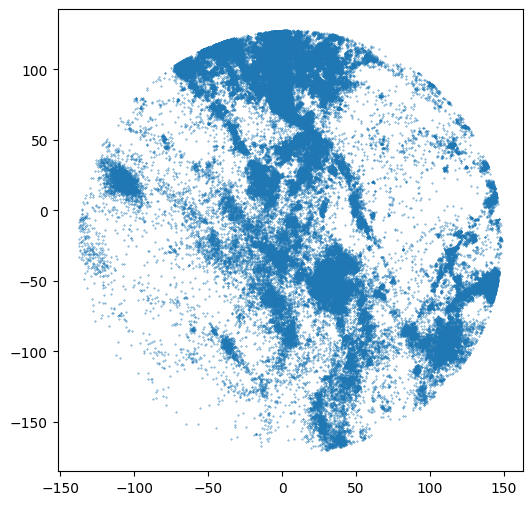

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(data=main_df, x="lat_norm", y = "long_norm", s=0.1 )

In [22]:
main_df['gridpoint'] = list(zip(main_df['lat_norm'], main_df['long_norm']))

In [23]:
lat_grid = (np.linspace(33.00, 35.00, 21) - 34) * 109
long_grid = (np.linspace(-117.00, -119.00, 21) + 118) * 92

In [24]:
#https://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
grid_geo = np.array(np.meshgrid(lat_grid, long_grid)).T.reshape(-1,2)
len(grid_geo)

441

To normalize longitude into kilometer measures:


* (LONGITUDE + 118) * 92
* (LATITUDE - 34) * 109

### Calculate distance between gridpoints and earthquakes

In [33]:
import math

In [34]:
math.dist(grid_geo[0], main_df['gridpoint'][0])

280.3974353523695

In [35]:
main_df.iloc[0]

id                                                      ci3324955
time                                   1970-01-02 10:45:20.570000
location                              24km S of Santa Barbara, CA
latitude                                                   34.206
longitude                                             -119.695667
depth                                                         6.0
magnitude                                                    3.14
alert                                                         NaN
url             https://earthquake.usgs.gov/earthquakes/eventp...
eventtype                                              earthquake
significance                                                  152
energy                                            34673685.045253
year                                                         1970
lat_norm                                                   21.836
long_norm                                             -156.001336
gridpoint 